<a href="https://colab.research.google.com/github/Gurpinder60/global_superstore/blob/main/Global_SuperStore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sqlite3
import pandas as pd
# Specify the path to the folder containing the CSV files
folder_path = '/content/drive/MyDrive/Forecast/'

# Load the CSV files into DataFrames
orders_df = pd.read_csv(folder_path + 'Orders.csv')
people_df = pd.read_csv(folder_path + 'People.csv')
returns_df = pd.read_csv(folder_path + 'Returns.csv')

# Connect to SQLite
conn = sqlite3.connect('/content/drive/MyDrive/Forecast/my_database.db')

# Load each DataFrame into the SQLite database
orders_df.to_sql('Orders', conn, if_exists='replace', index=False)
people_df.to_sql('People', conn, if_exists='replace', index=False)
returns_df.to_sql('Returns', conn, if_exists='replace', index=False)

# Confirm the tables are created
tables_df = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("\nTables in the database:")
print(tables_df)


Tables in the database:
      name
0   Orders
1   People
2  Returns


In [ ]:
query = '''
SELECT
    o.*,
    r.Returned,
    r.Region
FROM
    Orders o
Left JOIN
    Returns r ON o."Order ID" = r."Order ID"
'''

# Execute the query and load the result into a DataFrame
result_df = pd.read_sql_query(query, conn)

print("\nJoined DataFrame with All Columns:")
print(result_df)


Joined DataFrame with All Columns:
       Row ID                  Order ID Order Date Ship Date       Ship Mode  \
0       40098  CA-2014-AB10015140-41954   11/11/14  11/13/14     First Class   
1       26341    IN-2014-JR162107-41675     2/5/14    2/7/14    Second Class   
2       25330    IN-2014-CR127307-41929   10/17/14  10/18/14     First Class   
3       13524   ES-2014-KM1637548-41667    1/28/14   1/30/14     First Class   
4       47221   SG-2014-RH9495111-41948    11/5/14   11/6/14        Same Day   
...       ...                       ...        ...       ...             ...   
51285   29002   IN-2015-KE1642066-42174    6/19/15   6/19/15        Same Day   
51286   34337  US-2014-ZD21925140-41765     5/6/14   5/10/14  Standard Class   
51287   31315  CA-2012-ZD21925140-41147    8/26/12   8/31/12    Second Class   
51288    9596   MX-2013-RB1979518-41322    2/17/13   2/21/13  Standard Class   
51289    6147   MX-2013-MC1810093-41416    5/22/13   5/26/13    Second Class   

   

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


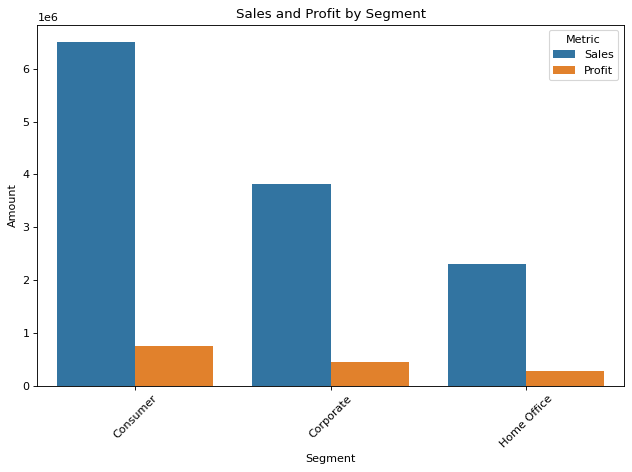

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming result_df has 'Segment', 'Sales', and 'Profit' columns
grouped_df = result_df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Reshape the data for plotting using melt, so Sales and Profit are two distinct values
melted_df = pd.melt(grouped_df, id_vars='Segment', value_vars=['Sales', 'Profit'], var_name='Metric', value_name='Amount')

# Plot side-by-side bar chart using seaborn with 'hue' for Sales and Profit
plt.figure(figsize=(8, 6), dpi=80)
sns.barplot(x='Segment', y='Amount', hue='Metric', data=melted_df)

# Add title and labels
plt.title('Sales and Profit by Segment')
plt.xlabel('Segment')
plt.ylabel('Amount')

# Rotate x-axis labels if necessary
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()
